# Analisis del experimento manual

A continuación se resumen las caracteristicas manejadas en el experimento:
1. Tasas de transferencia manejadas: Normal, 2kpps, 4kpps, 6kpps, 8kpps, 10kpps y flood.
2. Una replica por caso.
3. Por el momento la medición para el presente análisis esta con iperf.

In [17]:
# importando las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
from sklearn.covariance import EllipticEnvelope

## Medicion iperf asociada a cada tasa ##

A continuación se muestra el resultado del **iperf** para cada medición completa.

Metricas  Unnamed: 0   interval  transfer    BW
Tasa                                           
8kpps              0  0.0-200.2      2.18  93.4
2kpps              1  0.0-200.4      2.22  95.3
flooding           2  0.0-200.0      1.08  46.2
10kpps             3  0.0-200.2      2.16  92.5
normal             4  0.0-200.0      2.23  95.7
4kpps              5  0.0-200.2      2.21  94.7
6kpps              6  0.0-200.0      2.19  94.0


<IPython.core.display.Javascript object>


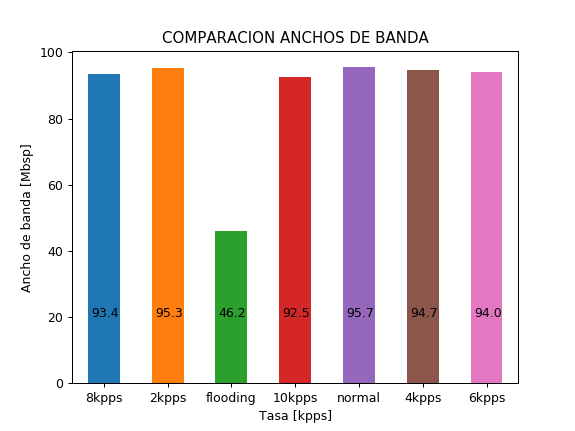

In [3]:
baseDir = './csv_files/'
archivo = 'resumen.csv'
dfSummary = pd.read_csv(baseDir + archivo,sep=';', index_col=1)
dfSummary.columns.name = 'Metricas'
dfSummary.index.name = 'Tasa'
print(dfSummary)

# Grafica asociada
%matplotlib notebook
axes = dfSummary['BW'].plot.bar(rot=0)
axes.set_title('COMPARACION ANCHOS DE BANDA')
axes.set_ylabel('Ancho de banda [Mbsp]')
axes.set_xlabel('Tasa [kpps]')
pos_x = 0
j = 0

for i in axes.patches:
    axes.text(pos_x - i.get_width()/2 + 0.05,20,str(dfSummary['BW'][j]))
    pos_x += 1
    j += 1    


## Grafico de la variación del ancho de banda con respecto al tiempo ##

             8kpps  2kpps  flooding  10kpps  normal  4kpps  6kpps
interval                                                         
0.0-1.0      109.0  102.0      43.0   109.0   102.0  106.0  105.0
1.0-2.0      101.0   99.6      38.8   105.0    95.4   98.6  104.0
2.0-3.0      105.0   98.6      36.7   118.0    94.4  102.0  105.0
3.0-4.0      106.0   96.5      35.7    96.5    95.4  106.0   98.6
4.0-5.0      114.0  103.0      51.4    93.3    96.5   91.2  107.0
5.0-6.0       80.7   93.3      40.9    95.4    95.4  110.0  109.0
6.0-7.0      110.0   97.5      39.8    93.3    96.5   91.2  102.0
7.0-8.0       83.9   97.5      37.7    94.4    95.4  104.0   87.0
8.0-9.0      110.0  109.0      37.7    92.3    96.5   94.4   97.5
9.0-10.0      82.8   90.2      34.6    91.2    95.4  103.0  104.0
10.0-11.0     82.8   97.5      46.1    92.3    94.4  114.0  103.0
11.0-12.0    110.0  108.0      36.7    91.2    95.4   94.4  104.0
12.0-13.0     82.8   98.6      40.9    92.3    96.5  102.0   68.2
13.0-14.0 

<IPython.core.display.Javascript object>


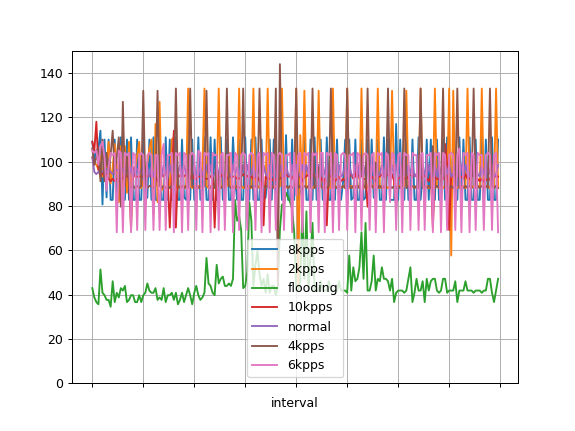

In [4]:
# print(dfSummary.index.values)
baseDir = './csv_files/'
iperf_BW = {}
files = os.listdir(baseDir)
for f in files:
    for k in dfSummary.index.values:
        if k in f:
            iperf_BW[k] = pd.read_csv(baseDir + f ,sep=';',index_col=0)

# Ancho de banda respecto al tiempo
df_bw = pd.DataFrame(columns=dfSummary.index.values)
for k in iperf_BW:
    df_bw[k] = iperf_BW[k]['BW']
print(df_bw)

# Grafica
%matplotlib notebook
axes = df_bw.plot(ylim = [0,150],grid = True)
l = axes.legend(loc='best')


## Resumen estadistico por test ##

In [84]:
'''
Codigo tomado de:
https://github.com/megansquire/masteringDM/blob/master/ch9/zscore.py
'''

def resumen(data):
    summ = {}
    summ['amax'] = np.amax(data)
    summ['amin'] = np.amin(data)
    summ['mean'] = np.mean(data)
    summ['median'] = np.median(data)
    summ['sumsqdiff'] = np.sum(pow((data - summ['median']),2))
    summ['sqrtdiff'] = np.sqrt(summ['sumsqdiff'])
    summ['mad']    = np.median(summ['sqrtdiff']) # median absolute deviation
    summ['modzscore'] = (0.6745 * summ['sumsqdiff']) / summ['mad'] # https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm
    return summ


columnas = ['amax','amin','mean','median','sumsqdiff','mad','modzscore']



df_sum_statistics = pd.DataFrame(index = dfSummary.index.values, 
                                 columns = columnas)




for k in dfSummary.index.values:
    df_sum_statistics.loc[k] = resumen(df_bw[k])
    #print(resumen(df_bw[k]))
    #print(k)

print(df_sum_statistics)
    
print ("\nAny value higher than modzscore is an outlier.")

print(df_sum_statistics.iloc[0])



         amax  amin     mean median sumsqdiff      mad modzscore
8kpps     117  80.7   93.391   82.8   57392.8  239.568   161.589
2kpps     133    44   95.488   89.1   55511.8  235.609   158.919
flooding   86  34.6   46.205   41.9   27365.1  165.424   111.579
10kpps    118  69.2   92.587   93.3   6549.28  80.9276   54.5857
normal    102  93.3  95.7125   94.4   1403.19  37.4592   25.2662
4kpps     144    44   94.805   89.1   50860.7  225.523   152.115
6kpps     109  68.2   94.206    103   62371.5  249.743   168.452

Any value higher than modzscore is an outlier.
amax             117
amin            80.7
mean          93.391
median          82.8
sumsqdiff    57392.8
mad          239.568
modzscore    161.589
Name: 8kpps, dtype: object


In [114]:
# https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html
'''
x = np.array([1, 2, 3, 4, 5])
np.sum(x < 6)
'''

array_8kpps = df_bw['8kpps']
out_8kpps = np.sum(df_bw['8kpps'] > df_sum_statistics.iloc[0]['modzscore'])
print(out_8kpps)

array_4kpps = df_bw['4kpps']
out_4kpps = np.sum(df_bw['4kpps'] > df_sum_statistics.iloc[5]['modzscore'])
print(out_4kpps)

array_2kpps = df_bw['2kpps']
out_2kpps = np.sum(df_bw['2kpps'] > df_sum_statistics.iloc[1]['modzscore'])
print(out_2kpps)

array_6kpps = df_bw['6kpps']
out_6kpps = np.sum(df_bw['6kpps'] > df_sum_statistics.iloc[6]['modzscore'])
print(out_4kpps)

array_10kpps = df_bw['10kpps']
out_10kpps = np.sum(df_bw['10kpps'] > df_sum_statistics.iloc[3]['modzscore'])
print(out_10kpps)

array_normal = df_bw['normal']
out_normal = np.sum(df_bw['normal'] > df_sum_statistics.iloc[4]['modzscore'])
print(out_normal)

array_flooding = df_bw['flooding']
out_flooding = np.sum(df_bw['flooding'] > df_sum_statistics.iloc[2]['modzscore'])
print(out_flooding)


0
0
0
0
200
200
0


## Boxplot ##

<IPython.core.display.Javascript object>


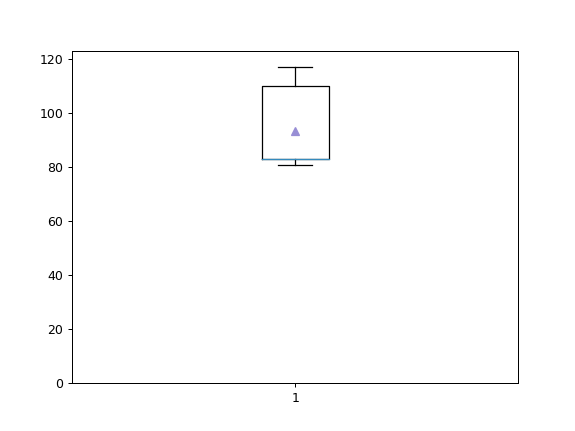

{'boxes': [<matplotlib.lines.Line2D at 0x7f0e3854b9b0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0e38551400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0e385564a8>],
 'means': [<matplotlib.lines.Line2D at 0x7f0e38556080>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0e38551c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0e3854bb00>,
  <matplotlib.lines.Line2D at 0x7f0e3854bf98>]}

In [86]:
%matplotlib notebook

flierprops = dict(marker='o', 
                  markerfacecolor='green', 
                  markersize=8,
                  linestyle='none')

plt.boxplot(df_bw['8kpps'], 
            showmeans=True, 
            flierprops=flierprops)


## Histograma ##

In [89]:
plt.hist(df_bw['8kpps'], bins=25)

(array([  1., 109.,  10.,   0.,   0.,   1.,   0.,   2.,   1.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,  67.,   2.,
          1.,   0.,   1.]),
 array([ 80.7  ,  82.152,  83.604,  85.056,  86.508,  87.96 ,  89.412,
         90.864,  92.316,  93.768,  95.22 ,  96.672,  98.124,  99.576,
        101.028, 102.48 , 103.932, 105.384, 106.836, 108.288, 109.74 ,
        111.192, 112.644, 114.096, 115.548, 117.   ]),
 <a list of 25 Patch objects>)

<IPython.core.display.Javascript object>


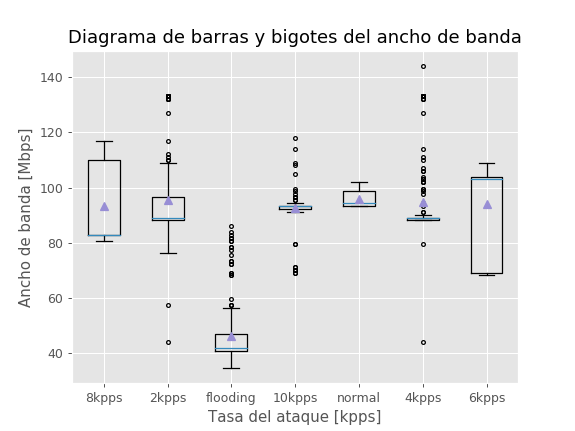

Text(0,0.5,'Ancho de banda [Mbps]')

In [96]:
box_labels = dfSummary.index.values
box_plot_data = []
for k in dfSummary.index.values:
    box_plot_data.append(df_bw[k])

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.boxplot(box_plot_data, notch=False, sym='.', vert=True, whis=1.5, \
            showmeans=True, labels=box_labels)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_title('Diagrama de barras y bigotes del ancho de banda')
ax1.set_xlabel('Tasa del ataque [kpps]')
ax1.set_ylabel('Ancho de banda [Mbps]')


<IPython.core.display.Javascript object>


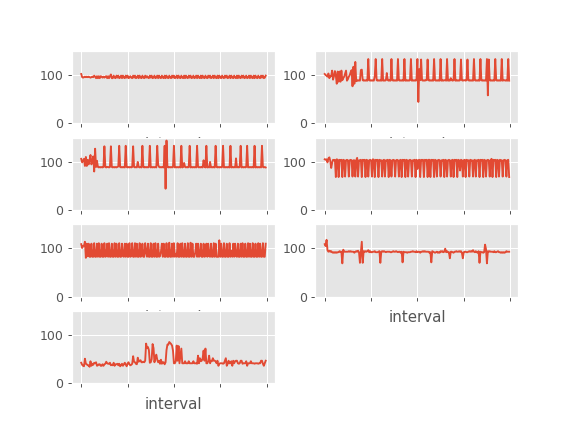

In [115]:
fig = plt.figure()
ax1 = fig.add_subplot(4,2,1)
df_bw['normal'].plot(ylim = [0,150],grid = True)
ax2 = fig.add_subplot(4,2,2)
df_bw['2kpps'].plot(ylim = [0,150],grid = True )
ax3 = fig.add_subplot(4,2,3)
df_bw['4kpps'].plot(ylim = [0,150],grid = True )
ax4 = fig.add_subplot(4,2,4)
df_bw['6kpps'].plot(ylim = [0,150],grid = True )
ax5 = fig.add_subplot(4,2,5)
df_bw['8kpps'].plot(ylim = [0,150],grid = True )
ax6 = fig.add_subplot(4,2,6)
df_bw['10kpps'].plot(ylim = [0,150],grid = True )
ax7 = fig.add_subplot(4,2,7)
df_bw['flooding'].plot(ylim = [0,150],grid = True )
